# Literature analysis

Rob Manually curated a bunch of the literature (~750 papers) in an excel file that is primarily in the CF Manuscripts folder. Here we plot the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'CF Microbiome and Metagenome Papers Annotated.txt',
 'microbiome_papers.ipynb',
 'SamplesPerPublication.png']

In [3]:
df = pd.read_csv('CF Microbiome and Metagenome Papers Annotated.txt', sep="\t")
df

,PMID,Sample Type,Journal,Article Title,Abstract,Number of samples/patients
0,37598041,fecal 16S,Journal of cystic fibrosis : official journal ...,The association between gut microbiome and gro...,"In cystic fibrosis (CF), pathophysiologic chan...",78
1,31992345,fecal 16S,Genome medicine,Interactions between the gut microbiome and ho...,Cystic fibrosis is the most common autosomal r...,?
2,37607068,fecal 16S,Microbiology spectrum,Tezacaftor/Ivacaftor therapy has negligible ef...,People with cystic fibrosis (pwCF) experience ...,12
3,35764510,fecal 16S,Journal of cystic fibrosis : official journal ...,"Modulation, microbiota and inflammation in the...",Cystic Fibrosis (CF) has prominent gastrointes...,14
4,36717332,fecal 16S,Journal of cystic fibrosis : official journal ...,"The gut microbiome, short chain fatty acids, a...",Adults with cystic fibrosis (CF) are at increa...,42
...,...,...,...,...,...,...
990,19047519,microbial genomics,Genome research,Newly introduced genomic prophage islands are ...,Pseudomonas aeruginosa isolates have a highly ...,NaN
991,18287045,microbial genomics,Proceedings of the National Academy of Science...,Dynamics of Pseudomonas aeruginosa genome evol...,One of the hallmarks of the Gram-negative bact...,NaN
992,29967020,microbial genomics,Antimicrobial agents and chemotherapy,Broad-Spectrum Adaptive Antibiotic Resistance ...,Surfing motility is a novel form of surface ad...,NaN
993,36625656,human genomics,mBio,SARS-CoV-2-Mediated Lung Edema and Replication...,"Coronaviruses (CoVs) of genera α, β, γ, and δ ...",NaN


In [4]:
df = df.dropna(axis=0)

In [5]:
df = df[df['Number of samples/patients'] != "?"]

In [6]:
df['num'] = df['Number of samples/patients'].astype(float)

In [7]:
df[df['Sample Type'] == 'fecal 16S'].max()

PMID                                                                   38960841
Sample Type                                                           fecal 16S
Journal                                                      Scientific reports
Article Title                 The relationship between the intestinal microb...
Abstract                      There is a paucity of knowledge on the longer-...
Number of samples/patients                                                   78
num                                                                       173.0
dtype: object

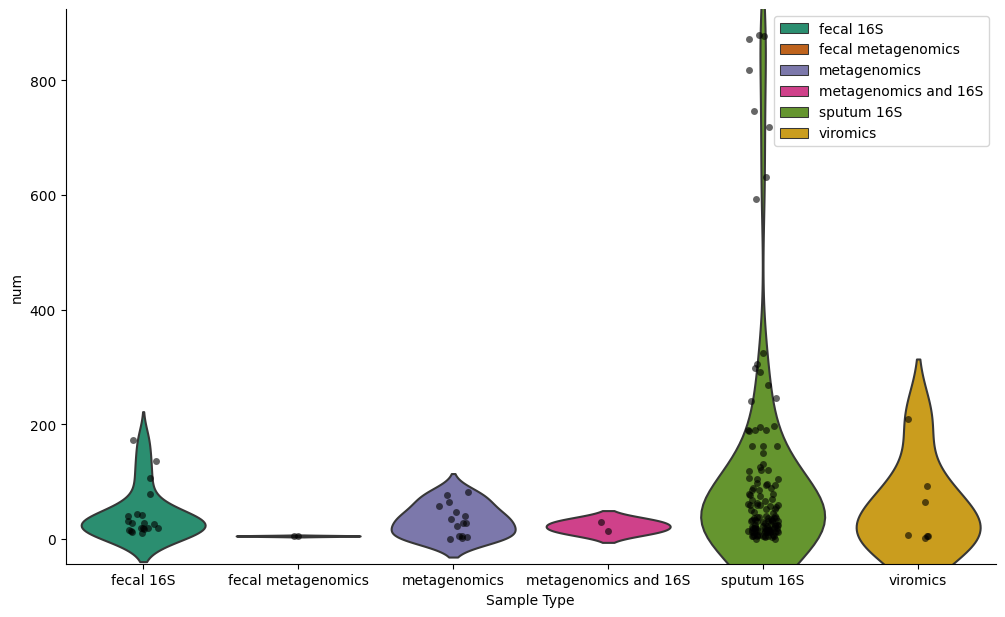

In [8]:
figsize = (12, 1.2 * len(df['Sample Type'].unique()))
plt.figure(figsize=figsize)
ax = sns.violinplot(data=df, x='Sample Type', y='num', hue='Sample Type', inner=None, palette='Dark2', dodge=False)
sns.stripplot(data=df, x='Sample Type', y='num', jitter=True, color='k', alpha=0.6)
sns.despine(top=True, right=True, bottom=False, left=False)
plt.show()

In [9]:
selected = df[(df['Sample Type'] == 'sputum 16S') | (df['Sample Type'] == 'metagenomics') | (df['Sample Type'] == 'viromics') | (df['Sample Type'] == 'metagenomics and 16S')]
selected.loc[selected['Sample Type'] == 'sputum 16S', 'Sample Type'] = '16S'
selected.loc[selected['Sample Type'] == 'metagenomics', 'Sample Type'] = 'Metagenomics'
selected.loc[selected['Sample Type'] == 'metagenomics and 16S', 'Sample Type'] = 'Metagenomics'
selected.loc[selected['Sample Type'] == 'viromics', 'Sample Type'] = 'Viromics'
selected

,PMID,Sample Type,Journal,Article Title,Abstract,Number of samples/patients,num
30,37474497,Metagenomics,Nature communications,Genome-scale metabolic modeling of Aspergillus...,"Aspergillus fumigatus, an opportunistic human ...",40,40.0
32,38762736,Metagenomics,Respiratory research,Comparative microbiome analysis in cystic fibr...,Bronchiectasis is a condition characterized by...,35,35.0
34,36748565,Metagenomics,Journal of medical microbiology,Meta-analysis of sputum microbiome studies ide...,Studying taxonomic and functional signatures o...,57,57.0
35,22951208,Metagenomics,Journal of cystic fibrosis : official journal ...,Metagenomics and metatranscriptomics: windows ...,Samples collected from CF patient airways ofte...,5,5.0
36,28187782,Metagenomics,Microbiome,Sputum DNA sequencing in cystic fibrosis: non-...,Cystic fibrosis (CF) is a life-threatening gen...,6,6.0
...,...,...,...,...,...,...,...
216,21178461,Viromics,Virulence,Deciphering the role of phage in the cystic fi...,Cystic fibrosis (CF) is a fatal genetic disord...,6,6.0
217,25741327,Viromics,Frontiers in microbiology,A metagenomic approach to characterize tempera...,"Pseudomonas aeruginosa (Pa), normally a soil c...",92,92.0
219,32442222,Viromics,PloS one,The intestinal virome in children with cystic ...,Intestinal bacterial dysbiosis is evident in c...,8,8.0
736,38702223,Metagenomics,Journal of cystic fibrosis : official journal ...,Widespread alterations in systemic immune prof...,Excessive inflammation and recurrent airway in...,28,28.0


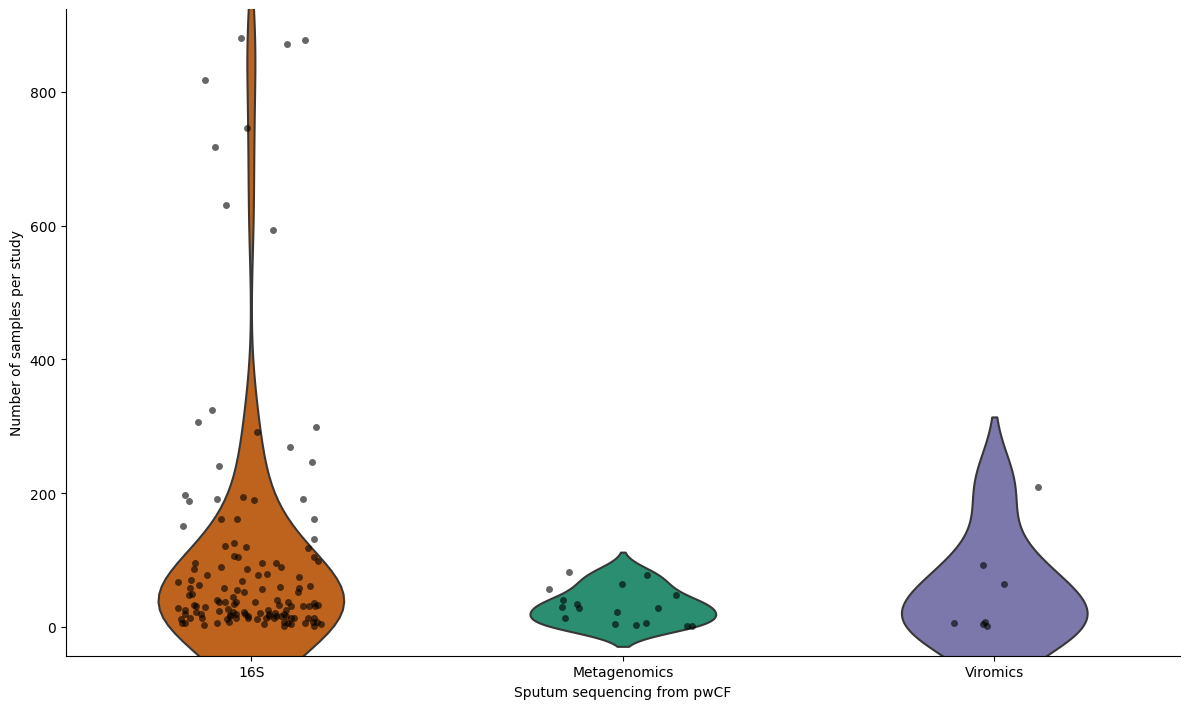

<Figure size 640x480 with 0 Axes>

In [26]:
figsize = (12, 1.2 * len(df['Sample Type'].unique()))
plt.figure(figsize=figsize)
order = ['16S', 'Metagenomics', 'Viromics']
ax = sns.violinplot(data=selected, x='Sample Type', y='num', hue='Sample Type', inner=None, palette='Dark2', dodge=False, width=0.5, order=order)
sns.stripplot(data=selected, x='Sample Type', y='num', jitter=0.2, color='k', alpha=0.6, order=order)
sns.despine(top=True, right=True, bottom=False, left=False)
plt.xlabel("Sputum sequencing from pwCF")
plt.ylabel("Number of samples per study")
plt.legend().remove()
plt.tight_layout()
plt.show()
plt.savefig('SamplesPerPublication.png')

In [11]:
selected.groupby(['Sample Type'])['num'].mean()

Sample Type
16S             108.221374
Metagenomics     31.941176
Viromics         55.285714
Name: num, dtype: float64

In [13]:
selected.groupby(['Sample Type'])['num'].median()

Sample Type
16S             37.0
Metagenomics    28.0
Viromics         8.0
Name: num, dtype: float64

In [22]:
selected.groupby(['Sample Type'])['num'].max()

Sample Type
16S             880.0
Metagenomics     82.0
Viromics        210.0
Name: num, dtype: float64

In [12]:
selected.groupby(['Sample Type'])['num'].count()

Sample Type
16S             131
Metagenomics     17
Viromics          7
Name: num, dtype: int64

In [23]:
selected[(selected['Sample Type'] == '16S') & (selected['num'] > 800)]

,PMID,Sample Type,Journal,Article Title,Abstract,Number of samples/patients,num
64,38261629,16S,American journal of respiratory and critical c...,Loss of Airway Phylogenetic Diversity Is Assoc...,The airway microbiome has the potential to sha...,877,877.0
94,34689185,16S,The ISME journal,"Association of bacterial community types, func...",Bacterial infection and inflammation of the ai...,818,818.0
158,27180018,16S,The Lancet. Respiratory medicine,The nasal microbiota in infants with cystic fi...,Respiratory tract infections and subsequent ai...,872,872.0
177,37546739,16S,bioRxiv : the preprint server for biology,Microbial community organization designates di...,Polymicrobial infection of the airways is a ha...,880,880.0


In [24]:
selected[(selected['Sample Type'] == 'Metagenomics') & (selected['num'] > 80)]

,PMID,Sample Type,Journal,Article Title,Abstract,Number of samples/patients,num
47,32580896,Metagenomics,The Journal of heart and lung transplantation ...,Pediatric lung transplantation: Dynamics of th...,Compositional changes in the microbiome are as...,82,82.0
